In [57]:
from sklearn.datasets import load_iris
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [58]:
iris = load_iris()

In [59]:
data = pd.DataFrame(iris.data, columns=iris.feature_names)
data_class = iris.target

In [60]:
df = data[['sepal length (cm)', 'sepal width (cm)']]

In [61]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df, data_class, test_size=0.25)

In [62]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

In [63]:
lda = LinearDiscriminantAnalysis()

In [64]:
lda.fit(X_train, y_train)

LinearDiscriminantAnalysis()

In [65]:
lda.predict(X_test)

array([1, 0, 1, 1, 0, 1, 1, 1, 2, 0, 0, 1, 2, 1, 1, 0, 2, 1, 2, 2, 2, 0,
       0, 1, 0, 2, 0, 0, 0, 1, 0, 2, 2, 2, 0, 1, 0, 0])

In [66]:
result = pd.DataFrame([y_test, lda.predict(X_test)]).T

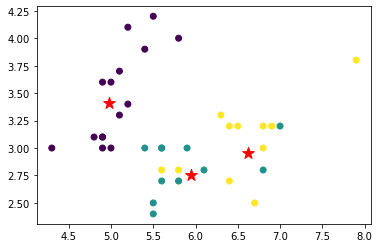

In [67]:
plt.scatter(X_test['sepal length (cm)'], X_test['sepal width (cm)'], c=y_test)
plt.scatter(lda.means_[:, 0], lda.means_[:, 1], c='r', s=150, marker='*')
plt.show()

In [68]:
df

,sepal length (cm),sepal width (cm)
0,5.1,3.5
1,4.9,3.0
2,4.7,3.2
3,4.6,3.1
4,5.0,3.6
...,...,...
145,6.7,3.0
146,6.3,2.5
147,6.5,3.0
148,6.2,3.4


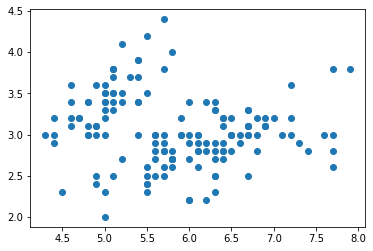

In [69]:
plt.scatter(df['sepal length (cm)'], df['sepal width (cm)'])

In [70]:
from sklearn.preprocessing import StandardScaler

In [71]:
scaler = StandardScaler()

In [72]:
df_scaled = scaler.fit_transform(df)

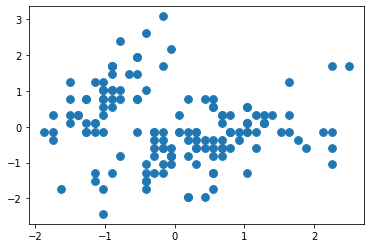

In [73]:
plt.scatter(df_scaled[:, 0], df_scaled[:, 1],cmap='autumn', s=60)

In [89]:
from sklearn.cluster import KMeans

In [90]:
# строим график локтя

# создаем список для инерции
k_inertia = []
# задаем диапазон кластеров
ks = range(1, 10)

for k in ks:
    clf_kmeans = KMeans(n_clusters=k)
    clusters_kmeans = clf_kmeans.fit_predict(df_scaled)
    # добавляем инерцию каждой модели в список
    k_inertia.append(clf_kmeans.inertia_)

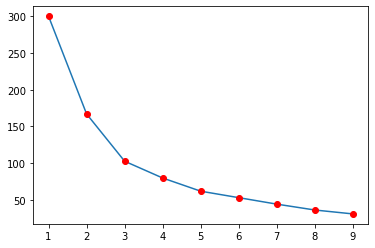

In [91]:
plt.plot(ks, k_inertia)
plt.plot(ks, k_inertia ,'ro')

In [92]:
# Исходя из графика оптимальное кол-во кластеров - 3
kmeans = KMeans(n_clusters=3)
clusters = kmeans.fit_predict(df_scaled)
clusters

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 2, 2, 2, 1, 2, 1, 2, 1, 2, 1, 1, 1, 1, 1, 1, 2,
       1, 1, 1, 1, 2, 1, 1, 1, 2, 2, 2, 2, 1, 1, 1, 1, 1, 1, 1, 2, 2, 1,
       1, 1, 1, 2, 1, 1, 1, 1, 1, 2, 1, 1, 2, 1, 2, 2, 2, 2, 1, 2, 1, 2,
       2, 1, 2, 1, 1, 2, 2, 2, 2, 1, 2, 1, 2, 1, 2, 2, 1, 2, 2, 2, 2, 2,
       2, 1, 1, 2, 2, 2, 1, 2, 2, 2, 1, 2, 2, 2, 1, 2, 2, 1])

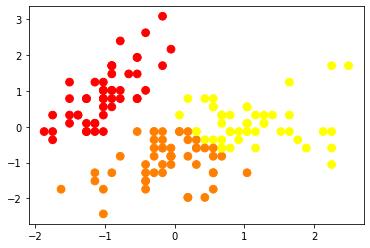

In [93]:
plt.scatter(df_scaled[:, 0], df_scaled[:, 1], cmap='autumn', c=clusters, s=60)